In [1]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk import tokenize



[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/garlotardey/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/garlotardey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/garlotardey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


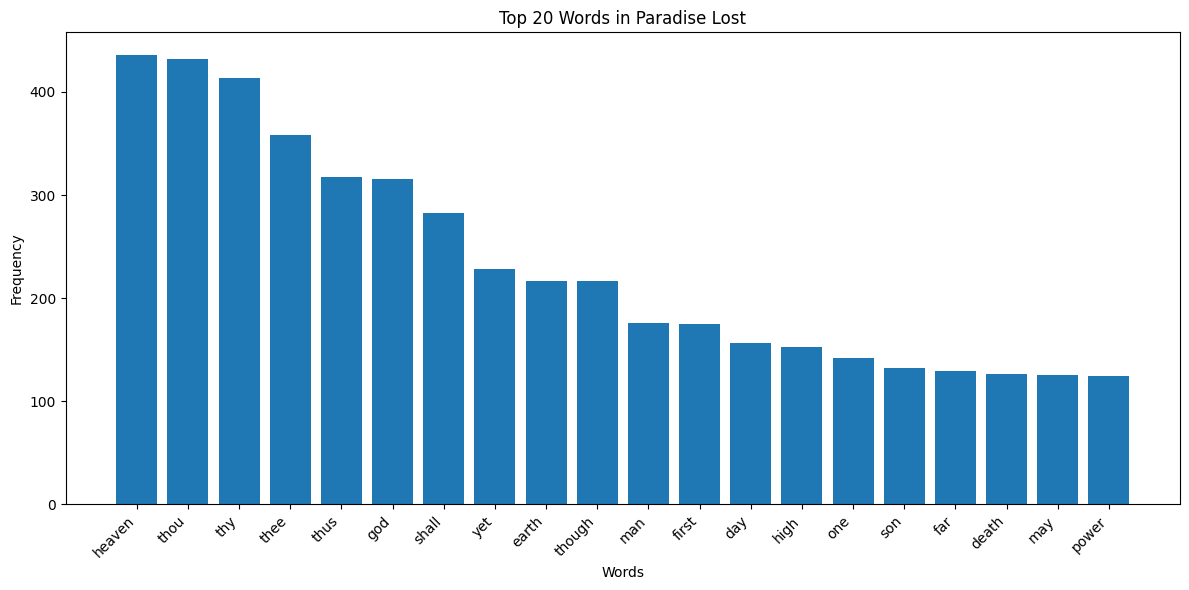

Top 20 Words in Paradise Lost:
heaven: 436
thou: 432
thy: 414
thee: 358
thus: 318
god: 316
shall: 283
yet: 228
earth: 217
though: 217
man: 176
first: 175
day: 157
high: 153
one: 142
son: 132
far: 129
death: 127
may: 126
power: 125


In [2]:
#1
nltk.download('gutenberg')
nltk.download('wordnet')
nltk.download('stopwords')

paradise_text = gutenberg.words('milton-paradise.txt')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

processed_words = [
    lemmatizer.lemmatize(word.lower()) 
    for word in paradise_text  
    if word.lower() not in stop_words  
    and word.isalpha()  
    and len(word) > 2  
    and not word.lower().isdigit()  
]

word_counts = Counter(processed_words)

top_words = word_counts.most_common(20)

plt.figure(figsize=(12, 6))
plt.bar([word for word, _ in top_words], [count for _, count in top_words])
plt.title('Top 20 Words in Paradise Lost')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 20 Words in Paradise Lost:")
for word, count in top_words:
    print(f"{word}: {count}")

i chose lmmatazation because it reduces words to their base stemming might reduce a word like walking to walk but lemmatization understands the gramatical context i converted words to lowercase to make things easier removed words shorter then 3 letters and removed numeric words

In [3]:
#2
def analyze_and_print_sentiment(filename, text_title, max_sentences=None):
    nltk.download('vader_lexicon')

    sentences = [" ".join(sent).strip() for sent in gutenberg.sents(filename)]
    if max_sentences:
        sentences = sentences[:max_sentences]
    
    sid = SentimentIntensityAnalyzer()
    
    positive, negative, neutral = [], [], []
    for sentence in sentences:
        scores = sid.polarity_scores(sentence)
        if scores['compound'] > 0.5:
            positive.append((sentence, scores['compound']))
        elif scores['compound'] < -0.5:
            negative.append((sentence, scores['compound']))
        else:
            neutral.append((sentence, scores['neu']))
    
    positive.sort(key=lambda x: x[1], reverse=True)
    negative.sort(key=lambda x: x[1])
    neutral.sort(key=lambda x: x[1], reverse=True)
    
    print(f"Sentiment Analysis for {text_title}")
    print("\nTop 5 Positive Sentences:")
    for sent, score in positive[:5]:
        print(f"Score: {score} | {sent}")
    
    print("\nTop 5 Negative Sentences:")
    for sent, score in negative[:5]:
        print(f"Score: {score} | {sent}")
    
    print("\nTop 5 Neutral Sentences:")
    for sent, score in neutral[:5]:
        print(f"Score: {score} | {sent}")
if __name__ == "__main__":
    analyze_and_print_sentiment('milton-paradise.txt', "Paradise Lost")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/garlotardey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis for Paradise Lost

Top 5 Positive Sentences:
Score: 0.9973 | Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccent

question 2 had the most positive, most nutral, and most negative scores based on their compound scores. the scores for the vader one are correct to me becasue they results are better and more accurate.